In [37]:
import sys
# Specify the directory where your data is located
project_dir = "D:/2M/D.Mining/Data-Mining-Project/"

# Change the working directory
sys.path.append(project_dir)


import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from src.utils import central_tendances, calculate_quartiles, histogram_plot, bar_plot
import sys



# Specify the directory where your data is located
data_directory = "D:/2M/D.Mining/Data-Mining-Project/"

# Change the working directory
os.chdir(data_directory)

sys.path.append("D:\\2M\D.Mining\Data-Mining-Project\\")

In [12]:
import warnings

warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100

## Load data


In [22]:
df = pd.read_csv(
    "data/processed/03_temp_dataset_processed_outliers_removed.csv", index_col=0
)
df.index = pd.to_datetime(df.index)

## Data Exploration


### General Information


In [23]:
df.head(10)

,time_period,zcta,population,test count,positive tests,case count,test rate,case rate,positivity rate
Midpoint Date,,,,,,,,,
2019-07-02,18.0,94085,23223.0,46.0,46.0,0.0,0.2,0.0,100.0
2019-07-02,18.0,94086,50477.0,50.0,0.0,0.0,0.1,0.0,0.0
2020-01-01,18.0,95127,66256.0,66.0,0.0,0.0,0.1,0.0,0.0
2020-01-01,18.0,95128,36975.0,110.0,0.0,0.0,0.3,0.0,0.0
2020-01-22,19.0,94085,23223.0,46.0,0.0,0.0,0.2,0.0,0.0
2020-01-22,19.0,94086,50477.0,100.0,50.0,0.0,0.2,0.0,50.0
2020-01-22,19.0,95129,39741.0,39.0,0.0,0.0,0.1,0.0,0.0
2020-03-04,21.0,94085,23223.0,487.0,146.0,139.0,2.1,0.6,30.0
2020-03-04,21.0,94086,50477.0,403.0,151.0,151.0,0.8,0.3,37.5


In [24]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 2019-07-02 to 2022-10-26
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time_period      264 non-null    float64
 1   zcta             264 non-null    int64  
 2   population       264 non-null    float64
 3   test count       264 non-null    float64
 4   positive tests   264 non-null    float64
 5   case count       264 non-null    float64
 6   test rate        264 non-null    float64
 7   case rate        264 non-null    float64
 8   positivity rate  264 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 20.6 KB


""


In [25]:
df.describe()

,time_period,zcta,population,test count,positive tests,case count,test rate,case rate,positivity rate
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,43.015152,94628.034091,47743.867424,3933.943182,112.049242,148.651515,398.103030,9.788636,4.569318
std,15.559030,511.911466,17246.898991,2599.982600,101.154822,153.354605,240.433429,10.244636,8.961341
min,18.000000,94085.000000,23223.000000,39.000000,0.000000,0.000000,0.100000,0.000000,0.000000
25%,30.000000,94086.000000,36975.000000,1958.000000,35.000000,46.750000,227.750000,2.900000,1.100000
50%,42.500000,95035.000000,50477.000000,3398.000000,84.000000,97.000000,390.650000,6.900000,2.400000
75%,52.750000,95128.000000,56668.000000,5883.250000,159.250000,191.500000,577.175000,13.300000,4.700000
max,155.000000,95129.000000,79655.000000,11016.000000,441.000000,813.000000,1221.500000,57.400000,100.000000


## Visualization


In [26]:
# change the type of zcta to object
df["zcta"] = df["zcta"].astype("str")

### 1. Distribution of the total number of confirmed cases and positive tests by zones

(Indication :Tree Map/Bar chart)


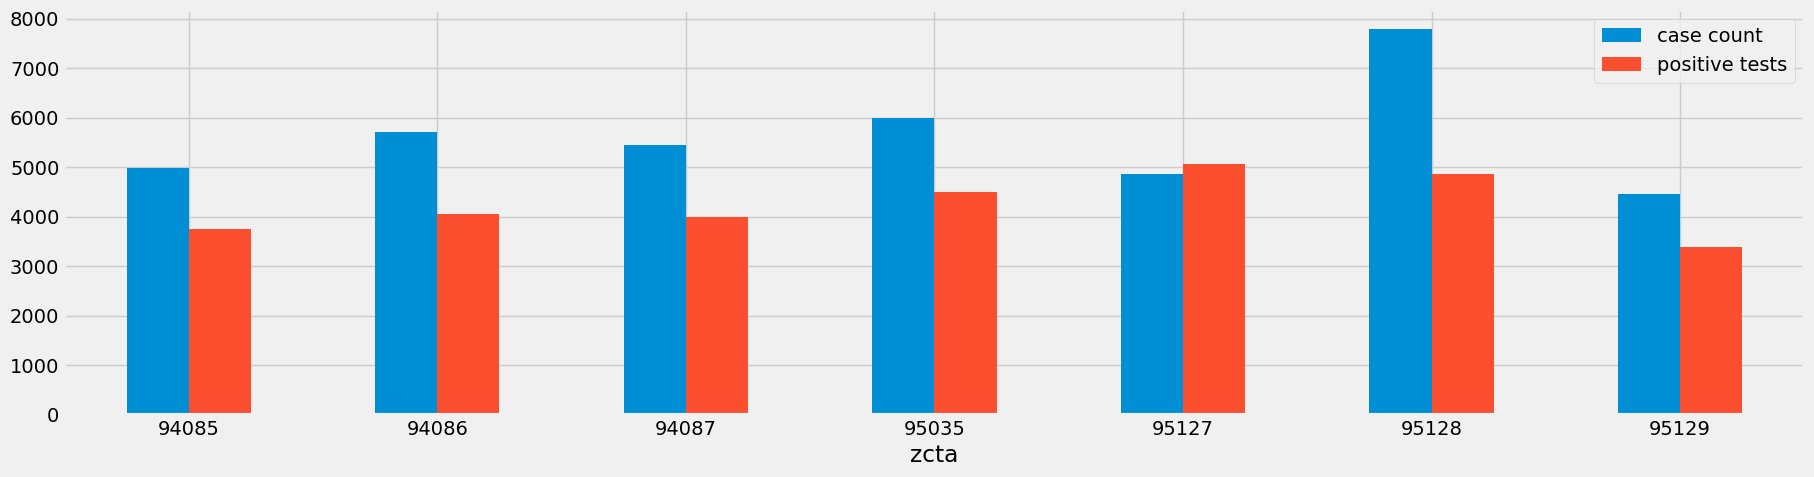

In [27]:
# 1. Distribution of the total number of confirmed cases and positive tests by zones bar plot
df.groupby("zcta")[["case count", "positive tests"]].sum().plot(
    kind="bar", figsize=(20, 5), rot=0
)
plt.savefig('reports/figures/02_TSA_2/01_distribution_of_the_total_number_of_confirmed_cases_and_positive_tests_by_zones_bar_plot.png')

### 2. How do COVID-19 tests, positive tests, and the number of cases evolve over time (weekly, monthly, and annually) for a chosen area?

(Indication: Line chart)


In [28]:
zones = df['zcta'].unique()
choosen_zone = zones[0]
selected_data = df[df['zcta'] == choosen_zone][['case count', 'test count', 'positive tests']]

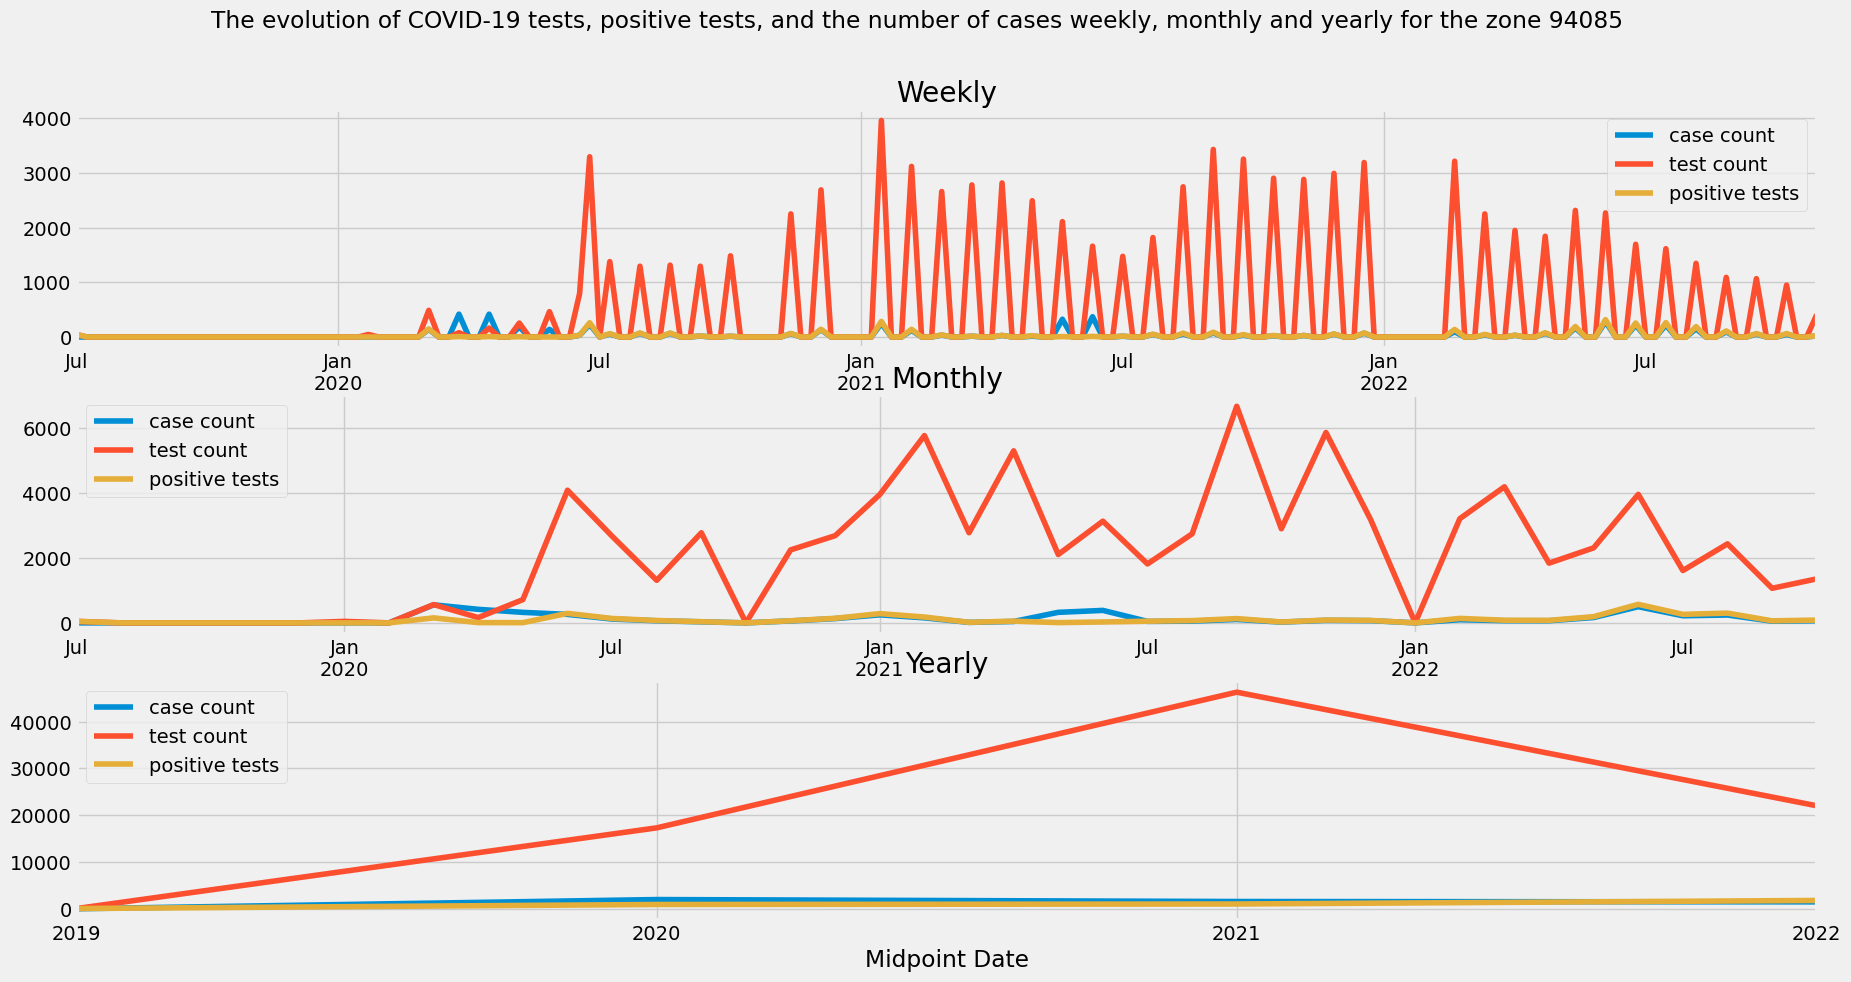

In [29]:
weekly_data = selected_data.resample("W").sum()
monthly_data = selected_data.resample("M").sum()
yearly_data = selected_data.resample("Y").sum()

# The evolution of COVID-19 tests, positive tests, and the number of cases weekly 
fig, axs = plt.subplots(3, 1, figsize=(20, 10))
fig.suptitle(f"The evolution of COVID-19 tests, positive tests, and the number of cases weekly, monthly and yearly for the zone {choosen_zone}")
weekly_data.plot(ax=axs[0], title="Weekly")
monthly_data.plot(ax=axs[1], title="Monthly")
yearly_data.plot(ax=axs[2], title="Yearly")
fig.savefig(f'reports/figures/02_TSA_2/02_evolution_over_time_for_{choosen_zone}.png')

### 3. How are positive COVID cases distributed by zone and by year?

(Guidance: Stacked Bar chart)


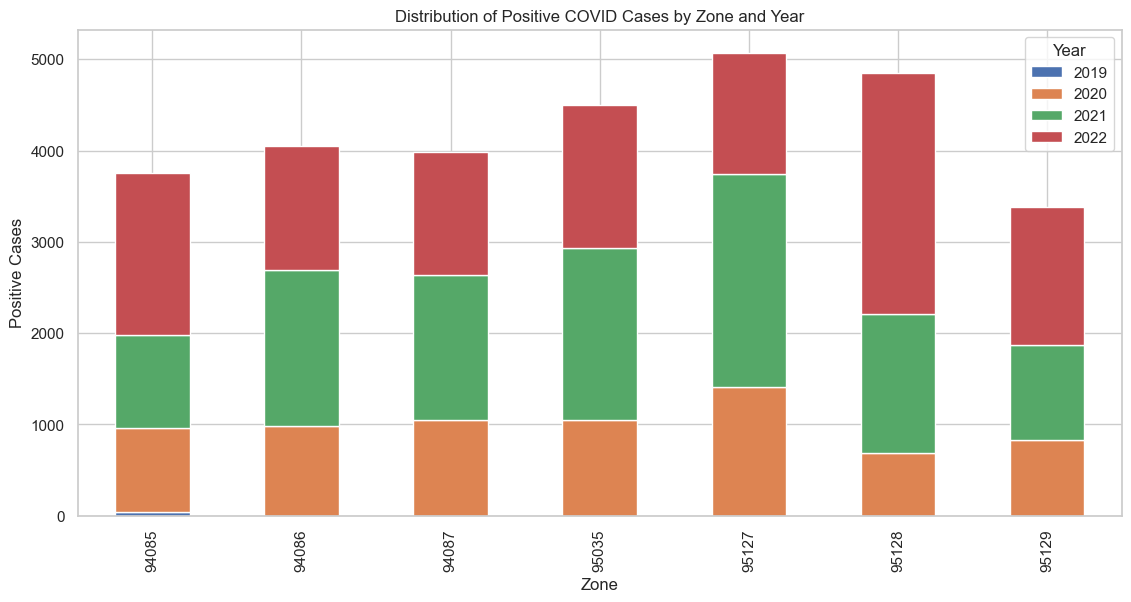

In [57]:
# Extract year from 'Midpoint Date'
df["Year"] = pd.DatetimeIndex(df.index).year
df["Month"] = pd.DatetimeIndex(df.index).month

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
pd.crosstab(df["zcta"], df["Year"], values=df["positive tests"], aggfunc="sum").plot(
    kind="bar", stacked=True, ax=plt.gca()
)

plt.xlabel("Zone")
plt.ylabel("Positive Cases")
plt.title("Distribution of Positive COVID Cases by Zone and Year")
plt.legend(title="Year", loc="upper right")
plt.savefig('reports/figures/02_TSA_2/03_distribution_of_positive_covid_cases_by_zone_and_year.png')
plt.show()

### 4. How can we effectively graphically represent the relationship between the population and the number of tests conducted?


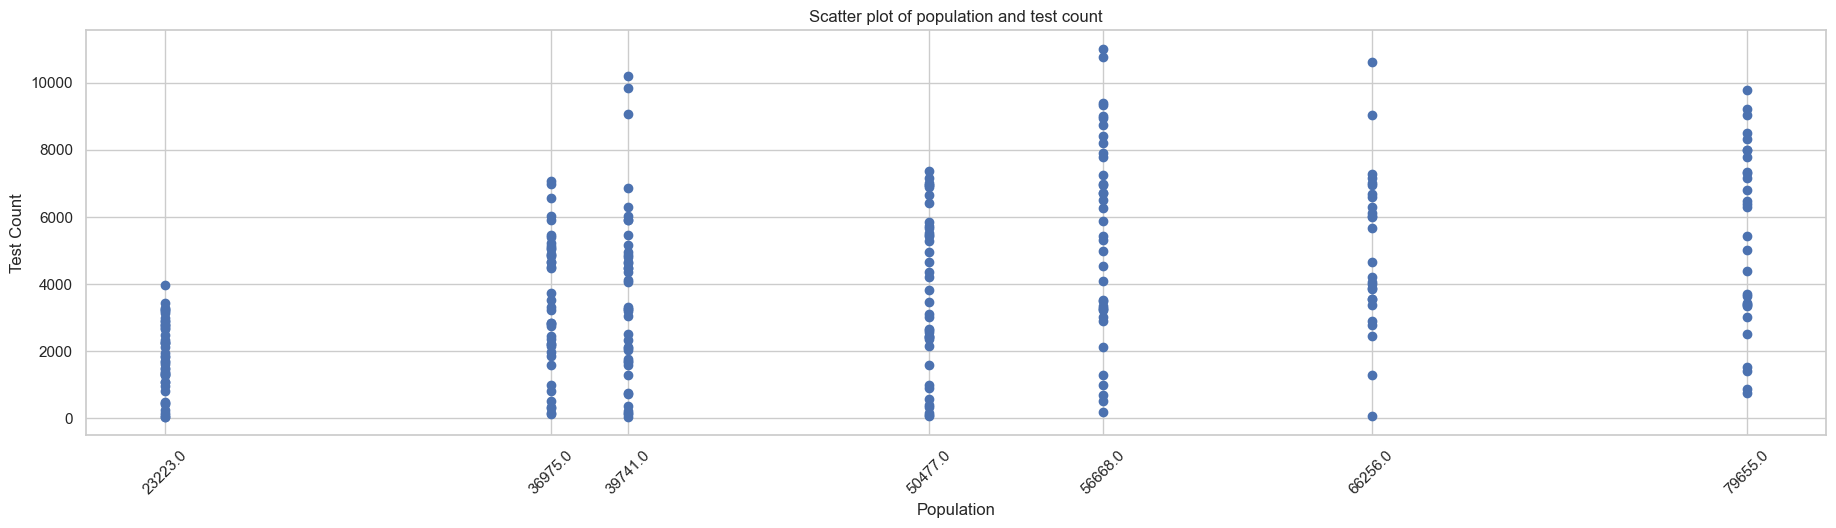

In [56]:
plt.scatter(df["population"], df["test count"])
plt.title("Scatter plot of population and test count")
plt.xlabel("Population")
plt.ylabel("Test Count")
plt.xticks(
    ticks=df["population"].unique(), labels=df["population"].unique(), rotation=45
)
plt.savefig('reports/figures/02_TSA_2/04_scatter_plot_of_population_and_test_count.png')
plt.show()

### 5. What are the 5 zones most heavily impacted by the coronavirus?


In [32]:
case_count_per_zone = df.groupby("zcta")["case count"].sum()
case_count_per_zone

zcta
94085    4987.0
94086    5704.0
94087    5437.0
95035    5997.0
95127    4869.0
95128    7792.0
95129    4458.0
Name: case count, dtype: float64

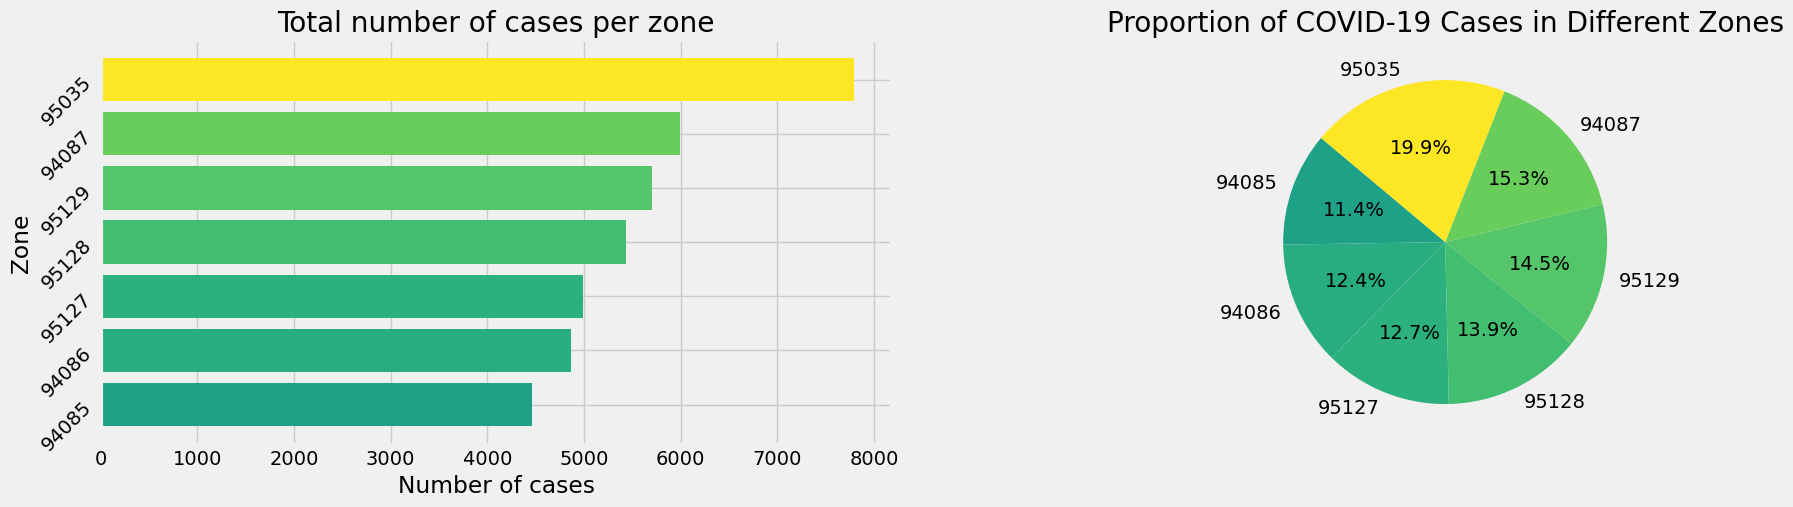

In [33]:
zones = df['zcta'].unique()
case_count_per_zone = df.groupby('zcta')['case count'].sum().sort_values()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].barh(zones, case_count_per_zone, color=plt.cm.viridis(
    case_count_per_zone / max(case_count_per_zone)))
axs[0].set_title('Total number of cases per zone')
axs[0].set_xlabel('Number of cases')
axs[0].set_yticks(ticks=zones)
axs[0].set_yticklabels(labels=zones, rotation=45)
axs[0].set_ylabel('Zone')

axs[1].pie(case_count_per_zone, labels=zones, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.viridis(case_count_per_zone / max(case_count_per_zone)))
axs[1].set_title('Proportion of COVID-19 Cases in Different Zones')
fig.savefig('reports/figures/02_TSA_2/05_total_number_of_cases_per_zone.png')

### 6. What is the relationship between confirmed cases, tests conducted, and positive tests for each zone?

(The time period needs to be selected)


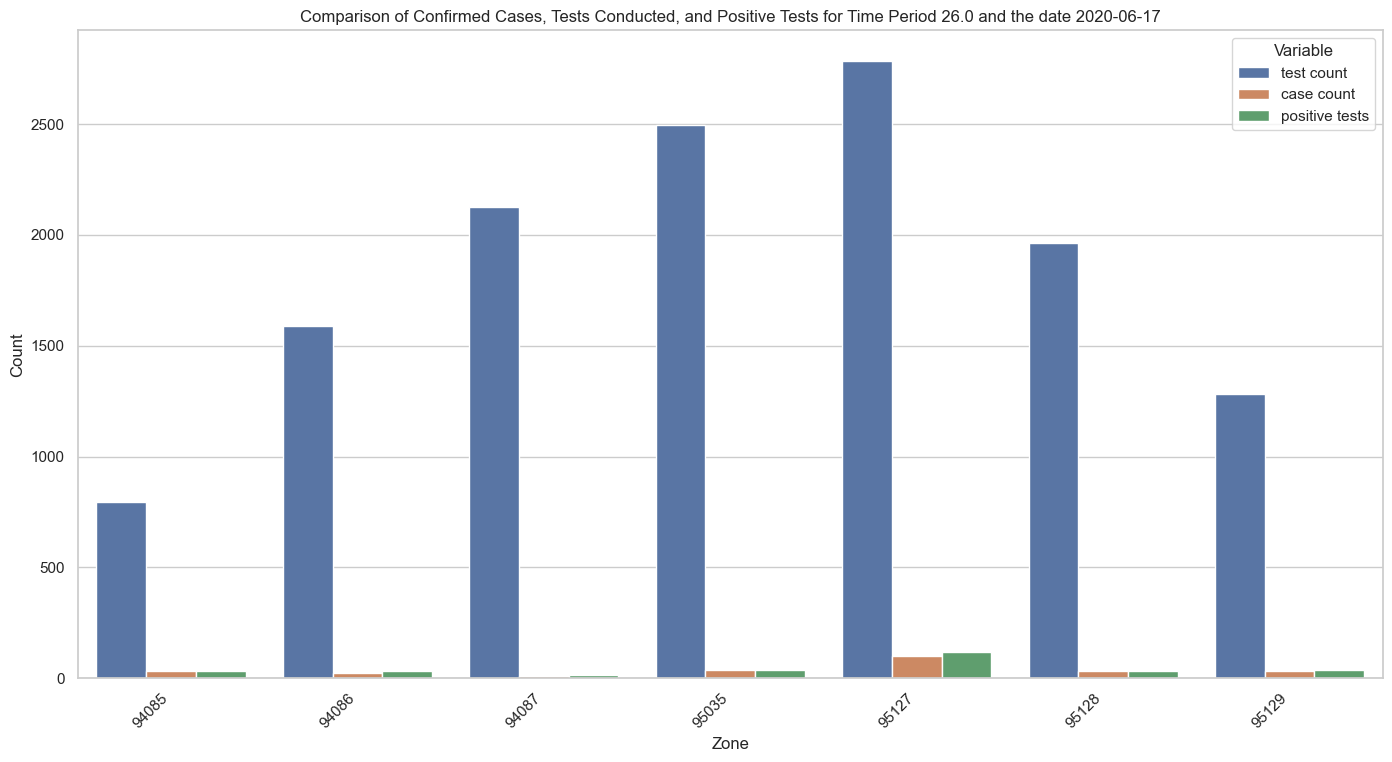

In [54]:
time_period = df['time_period'].mode()[0]
chosen_time_period_data = df[df['time_period'] == time_period]

cols_to_compare = ['test count', 'case count', 'positive tests']

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(x='zcta', y='value', hue='variable', data=pd.melt(chosen_time_period_data, id_vars=['zcta'], value_vars=cols_to_compare))
plt.title(f'Comparison of Confirmed Cases, Tests Conducted, and Positive Tests for Time Period {time_period} and the date {chosen_time_period_data.index[0].date()}')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.legend(title='Variable')
plt.xticks(rotation=45, ha='right')
plt.savefig('reports/figures/02_TSA_2/06_comparison_of_confirmed_cases_tests_conducted_and_positive_tests_for_time_period')
plt.show()
